In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [55]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv('Advertising.csv')
df.head(60)
df.drop_duplicates(inplace=True)
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 5)

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

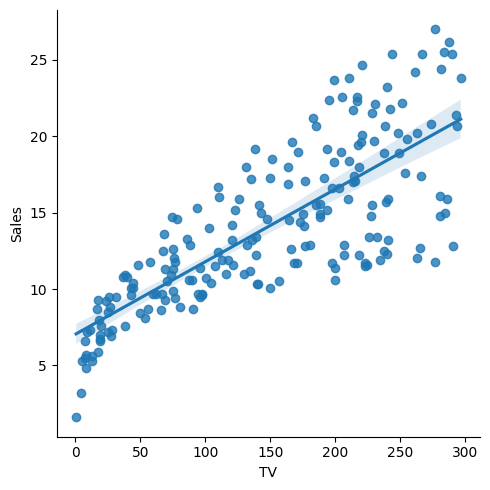

In [5]:
sns.lmplot(x="TV",y="Sales",data=df);
#it can be a linear function

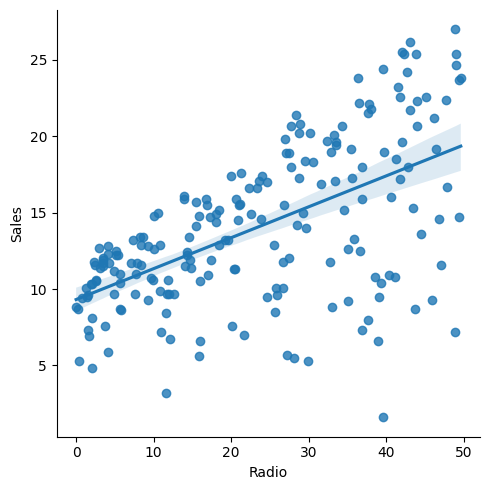

In [6]:
sns.lmplot(x="Radio",y="Sales",data=df);
#linear relation

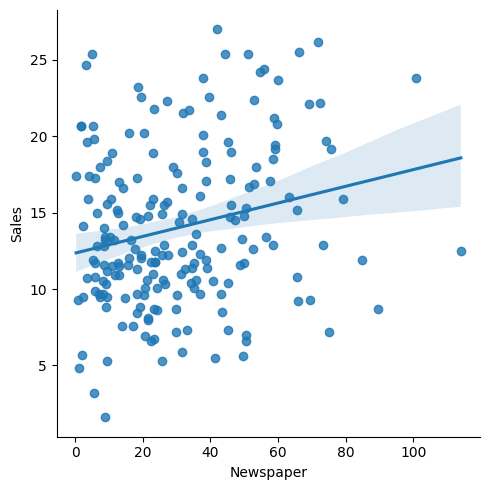

In [7]:
sns.lmplot(x="Newspaper",y="Sales",data=df);
#non linear

In [8]:
df.corr()['Sales']

Unnamed: 0   -0.051616
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Sales         1.000000
Name: Sales, dtype: float64

In [9]:
df.keys()

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
#labeling the y axis for prdiction
#featiring the x-axis
x=df[['TV', 'Radio', 'Newspaper']]
y=df['Sales']

In [11]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
# constant (b - bias)
model.intercept_

# coefficients (w - weights)
model.coef_

array([ 3.77588591,  2.88656448, -0.05946128])

In [17]:
y_pred=model.predict(X_test)

In [18]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)
r2_score=r2_score(y_test,y_pred)
print(r2_score*100)

2.09812256349568
86.01145185017869


In [19]:
print(y_pred)

[10.05739563  7.4522807   7.0197076  24.08029725 12.01786259  6.53793858
 12.78286918 15.10974587 10.76974013 16.34357951 22.88297477  9.12924467
 10.46455672 15.48743552 11.58555633 12.17296914 18.76551502 10.78318566
 15.90515992 17.30651279 24.06692057  9.59834224 15.13512211 12.38591525
  5.71360885 15.24749314 12.29402334 20.9421167  13.40991558  9.04348832
 12.89239415 21.40272028 18.13802209 21.17320803  6.56974433  6.14114206
  7.89018394 13.01541434 14.68953791  6.18835143]


In [20]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predict': y_pred.flatten()})
act_predict.head(5)

,Actual,Predict
0,11.3,10.057396
1,8.4,7.452281
2,8.7,7.019708
3,25.4,24.080297
4,11.7,12.017863


<Axes: >

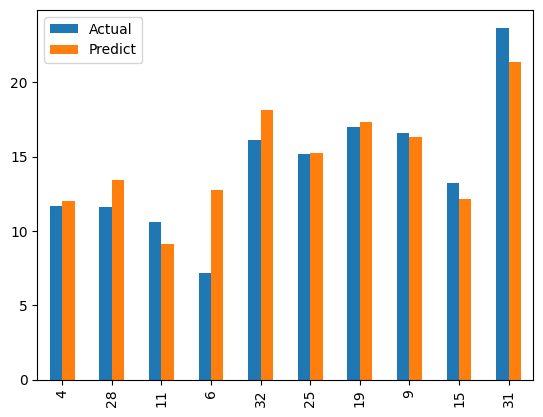

In [21]:
act_predict.sample(10).plot(kind='bar')


In [22]:
# Calculate the R-squared value for the train data
train_score = model.score(X_train, y_train)

# Calculate the R-squared value for the test data
test_score = model.score(X_test, y_test)

# Print the R-squared values for both the train and test data
print("R-squared value for train data:", train_score*100)
print("R-squared value for test data:", test_score*100)

R-squared value for train data: 90.67114990146382
R-squared value for test data: 86.01145185017869
